In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [20]:

def preprocess_house_data(file_path):
    """
    Preprocesses the New York House dataset by performing data cleaning, data type conversion,
    outlier handling, and providing descriptive statistics and correlation matrix.

    Parameters:
    - file_path: str, the file path to the CSV dataset.

    Returns:
    - A tuple containing:
        - initial assessment information (missing values, duplicates)
        - final data shape after cleaning and preprocessing
        - the first few rows of the DataFrame
        - descriptive statistics for the dataset
        - correlation matrix for numerical columns in the dataset
    """

    # Load the dataset
    data = pd.read_csv(file_path)

    # Initial assessment for cleaning and preprocessing
    missing_values = data.isnull().sum()
    duplicates = data.duplicated().sum()
    initial_assessment = (missing_values, duplicates)

    # Removing duplicates
    data_cleaned = data.drop_duplicates()

    # Data Type Conversion
    data_cleaned.loc[:, 'BEDS'] = data_cleaned['BEDS'].astype('category')
    data_cleaned.loc[:, 'BATH'] = data_cleaned['BATH'].astype('category')

    # Outlier Detection and Handling for 'PRICE'
    Q1 = data_cleaned['PRICE'].quantile(0.25)
    Q3 = data_cleaned['PRICE'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indexes = data_cleaned.loc[(data_cleaned['PRICE'] < lower_bound) | (
        data_cleaned['PRICE'] > upper_bound)].index
    data_cleaned.loc[outlier_indexes,
                     'PRICE'] = data_cleaned.loc[outlier_indexes,
                                                 'PRICE'].clip(lower=lower_bound,
                                                               upper=upper_bound)

    # Final check for missing values and duplicates after adjustments
    final_data_shape_corrected = data_cleaned.shape

    # Descriptive statistics for the dataset
    descriptive_stats = data.describe()

    # Calculate correlation matrix
    numerical_data = data.select_dtypes(include=[np.number])
    correlation_matrix = numerical_data.corr()

    # Returns
    return data_cleaned, initial_assessment, final_data_shape_corrected, data.head(
    ), descriptive_stats, correlation_matrix


In [33]:
# Function to create a scatter plot for relational graph
def plot_relational_graph(data):
    """
    Creates a scatter plot showing the relationship between property square footage and price.

    Args:
    data (DataFrame): The pandas DataFrame containing the dataset.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=data, alpha=0.6, palette='coolwarm')  # Changed to a coolwarm palette
    plt.title('Relationship between Property Square Footage and Price')
    plt.xlabel('Property Square Footage (sqft)')
    plt.ylabel('Price ($)')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.show()

In [22]:

# Function to create a bar chart for categorical graph
def plot_categorical_graph(data):
    """
    Creates a bar chart comparing the number of properties available by type.

    Args:
    data (DataFrame): The pandas DataFrame containing the dataset.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x='TYPE', data=data, order=data['TYPE'].value_counts().index)
    plt.title('Number of Properties Available by Type')
    plt.xlabel('Property Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()


In [23]:

# Function to create a box plot for statistical graph
def plot_statistical_graph(data):
    """
    Creates a box plot to visualize the distribution of property prices across different property types.

    Args:
    data (DataFrame): The pandas DataFrame containing the dataset.

    Returns:
    None
    """
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='TYPE', y='PRICE', data=data)
    plt.title('Distribution of Property Prices by Type')
    plt.xlabel('Property Type')
    plt.ylabel('Price ($)')
    plt.yscale('log')  # Using log scale due to wide range of prices
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()


In [24]:

file_path = 'NY-House-Dataset.csv'
data, initial_assessment, final_shape, first_rows, descriptive_stats, correlation_matrix = preprocess_house_data(
    file_path)


In [25]:
# Output the results for review
print("First Rows of DataFrame:\n", first_rows)



First Rows of DataFrame:
                                          BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 

In [26]:
print("Initial Assessment:", initial_assessment)


Initial Assessment: (BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64, 214)


In [27]:
print("Final Data Shape:", final_shape)


Final Data Shape: (4587, 17)


In [28]:
print("Descriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
               PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450  


In [29]:
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                  PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
PRICE         1.000000  0.052189  0.079371      0.110889 -0.020392  -0.054273
BEDS          0.052189  1.000000  0.776447      0.420503 -0.060933  -0.004529
BATH          0.079371  0.776447  1.000000      0.483935 -0.052235  -0.070892
PROPERTYSQFT  0.110889  0.420503  0.483935      1.000000  0.023413  -0.037308
LATITUDE     -0.020392 -0.060933 -0.052235      0.023413  1.000000   0.513969
LONGITUDE    -0.054273 -0.004529 -0.070892     -0.037308  0.513969   1.000000


C:\Users\sumsa\AppData\Local\Temp\ipykernel_19472\3486058467.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=data, alpha=0.6, palette='coolwarm')  # Changed to a coolwarm palette


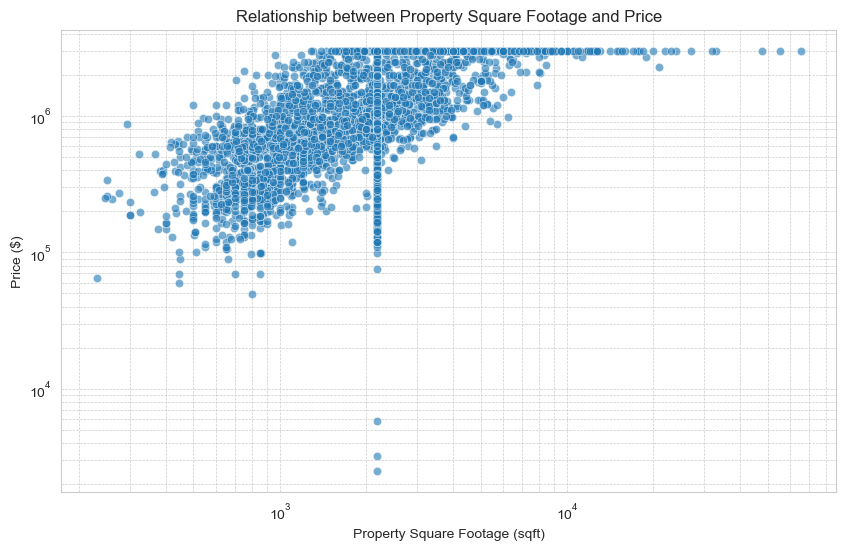

In [34]:
plot_relational_graph(data)


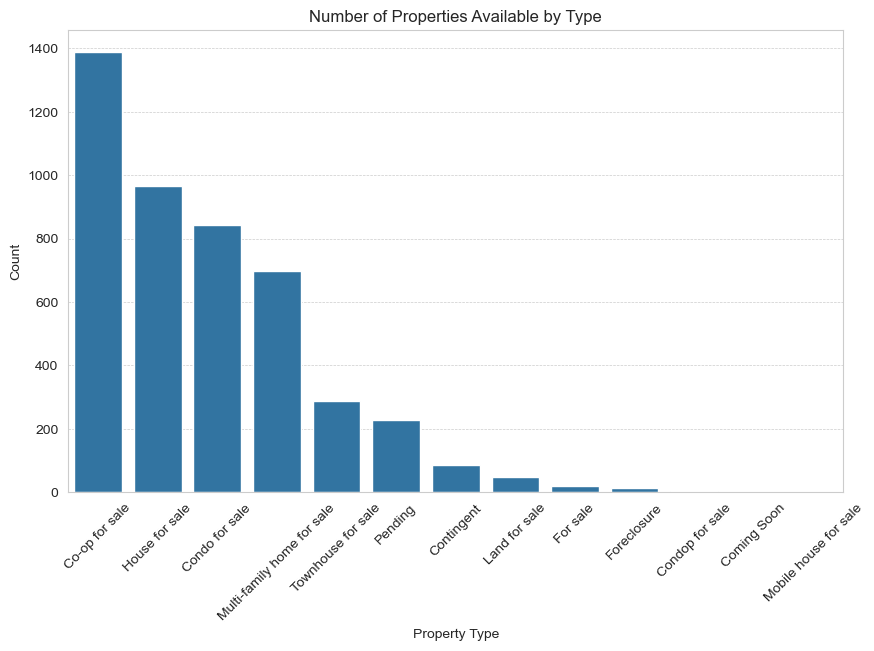

In [31]:
plot_categorical_graph(data)


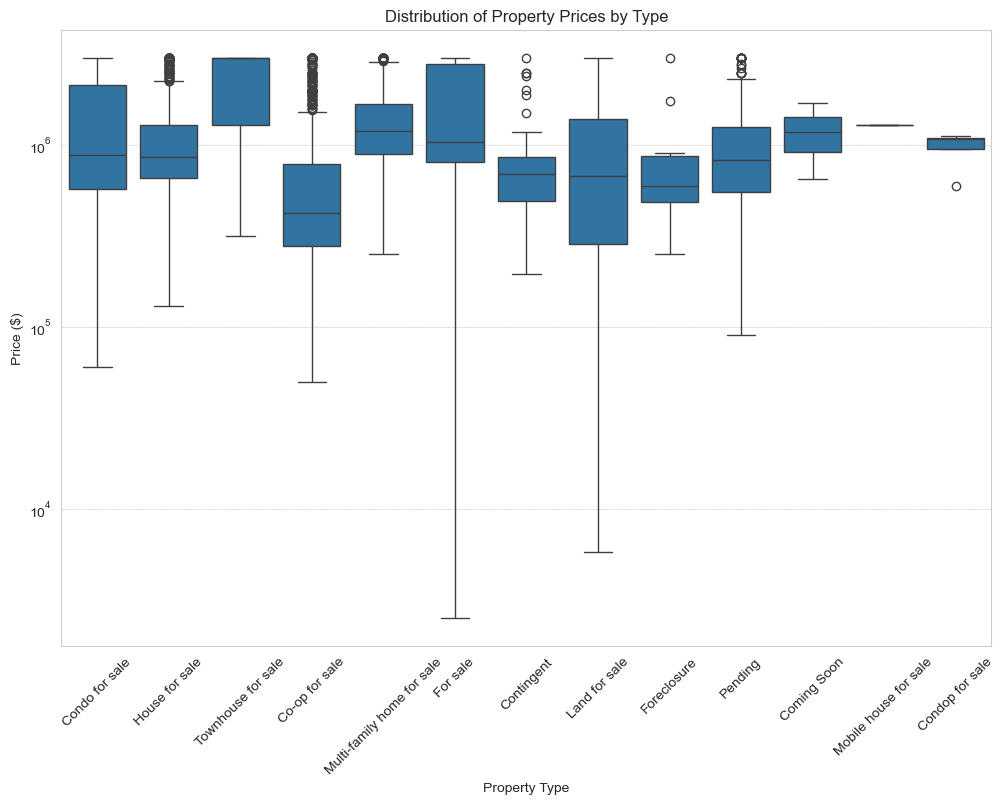

In [32]:
plot_statistical_graph(data)